In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter 
import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

sb.set(font_scale = 1.9)

def null_cleaning(data,columns):
    df =data
    for column in columns:
         df = df[df[column].notna()]
    return df

def value_cleaning(data, columns, value):
    df = data
    for column in columns:
        df = df[df[column] > value];
    return df

def outlier_cleaning(data, columns):
    df = data
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]
    return data
        
def plot_most_popular(data, region, base):
    publisher = data.groupby(base)[region].sum().reset_index()
    top_10 = publisher.nlargest(10,region)
    f = plt.figure(figsize= (50,10))
    #total sales
    sb.barplot(data=top_10, x=base, y=region, palette="dark")
    game_sales_scatter = data.loc[data[base].isin(top_10[base])]
    print(game_sales_scatter.shape)
    game_sales_scatter = game_sales_scatter[game_sales_scatter[region] > 0]
    print(game_sales_scatter.shape)
    f = plt.figure(figsize= (50,10))
    sb.boxplot(data=game_sales_scatter, x=base, y=region, palette="deep")



54
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64


<AxesSubplot:>

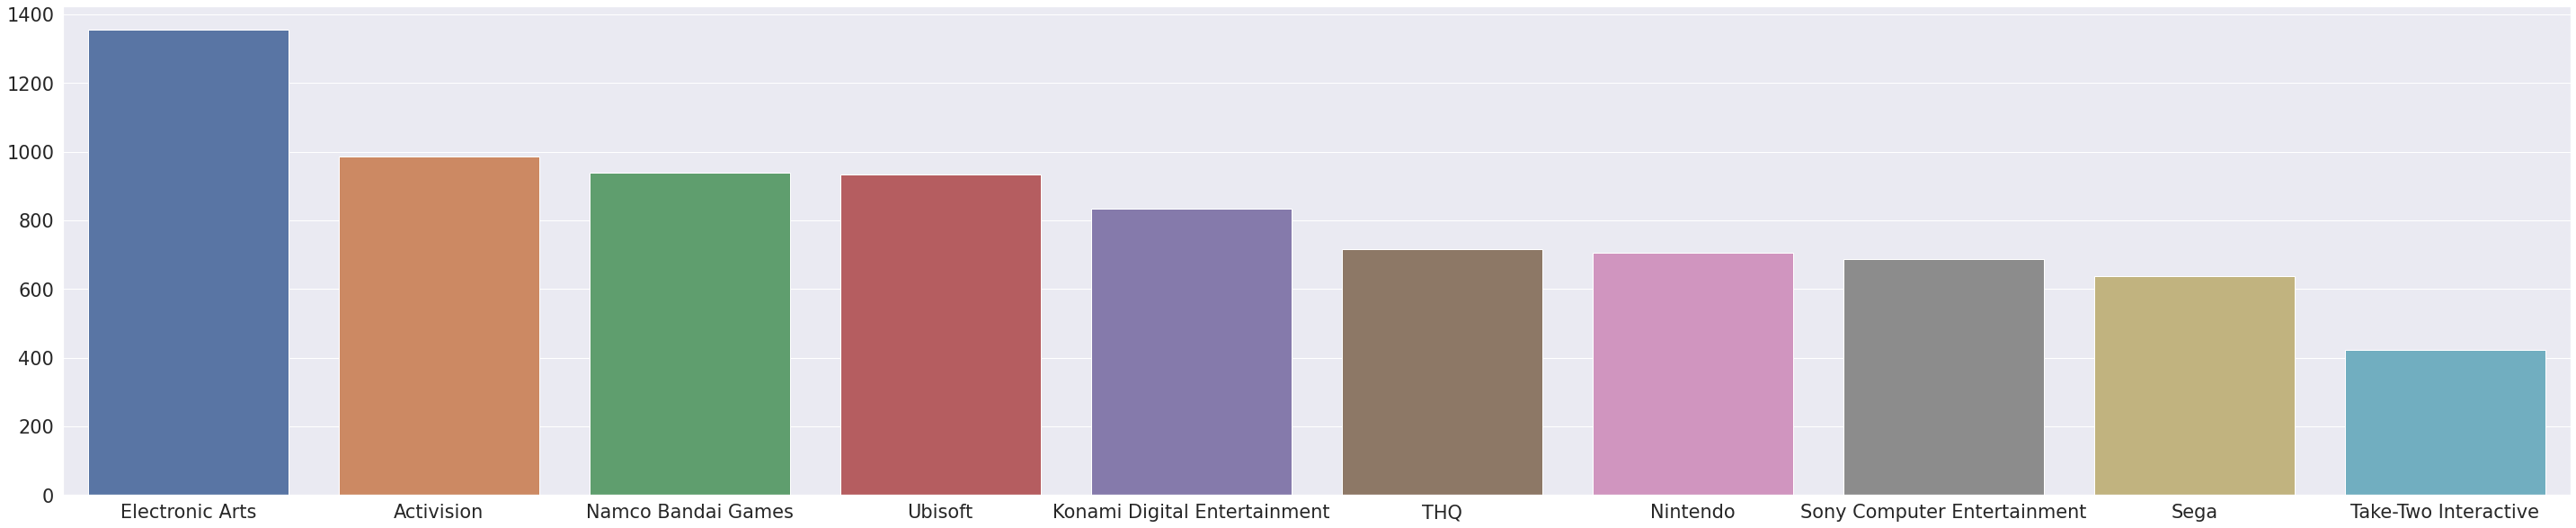

In [2]:
data = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')
sales = ["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
#checking invalid data rows
print(data["Publisher"].isnull().sum());
print(data[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].isnull().sum())
#simple cleaning
cleaned_data = null_cleaning(data, ["Publisher"])
print(cleaned_data["Publisher"].value_counts())
#top 10 publishers with the most number of games
top_10 = Counter(cleaned_data['Publisher'].tolist()).most_common(10)
top_x, top_y = [x[0] for x in top_10], [x[1] for x in top_10]
f = plt.figure(figsize= (50,10))
sb.barplot(x=top_x,y=top_y, palette="deep")

(7000, 16)
(6092, 16)
(7467, 16)
(5707, 16)
(4854, 16)
(3317, 16)
(7467, 16)
(5630, 16)
(8215, 16)
(8215, 16)
(23, 16)
(23, 16)


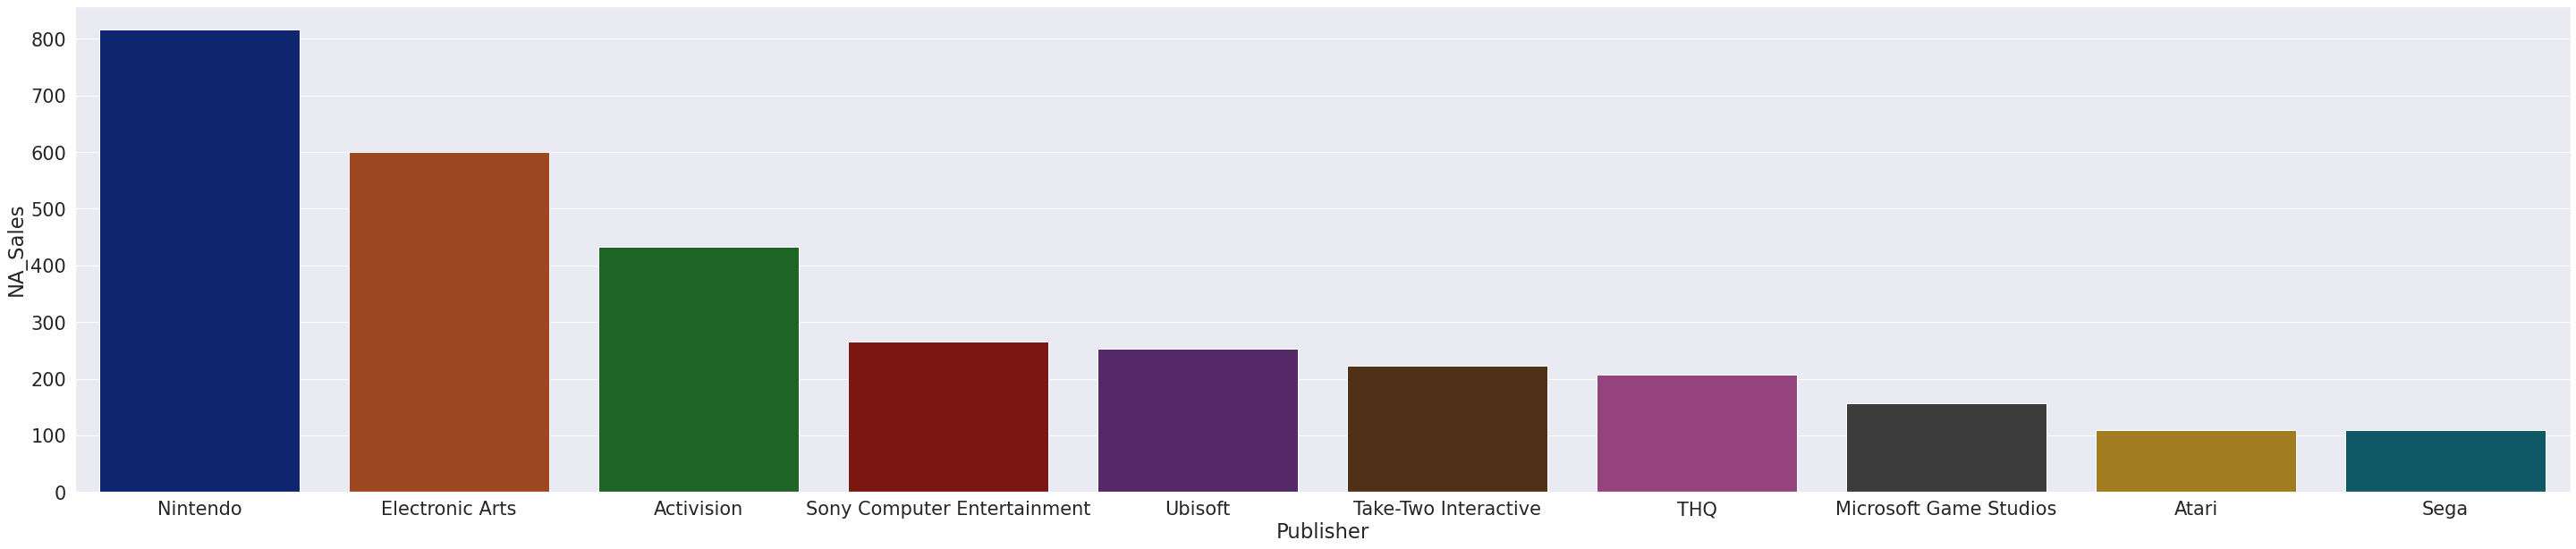

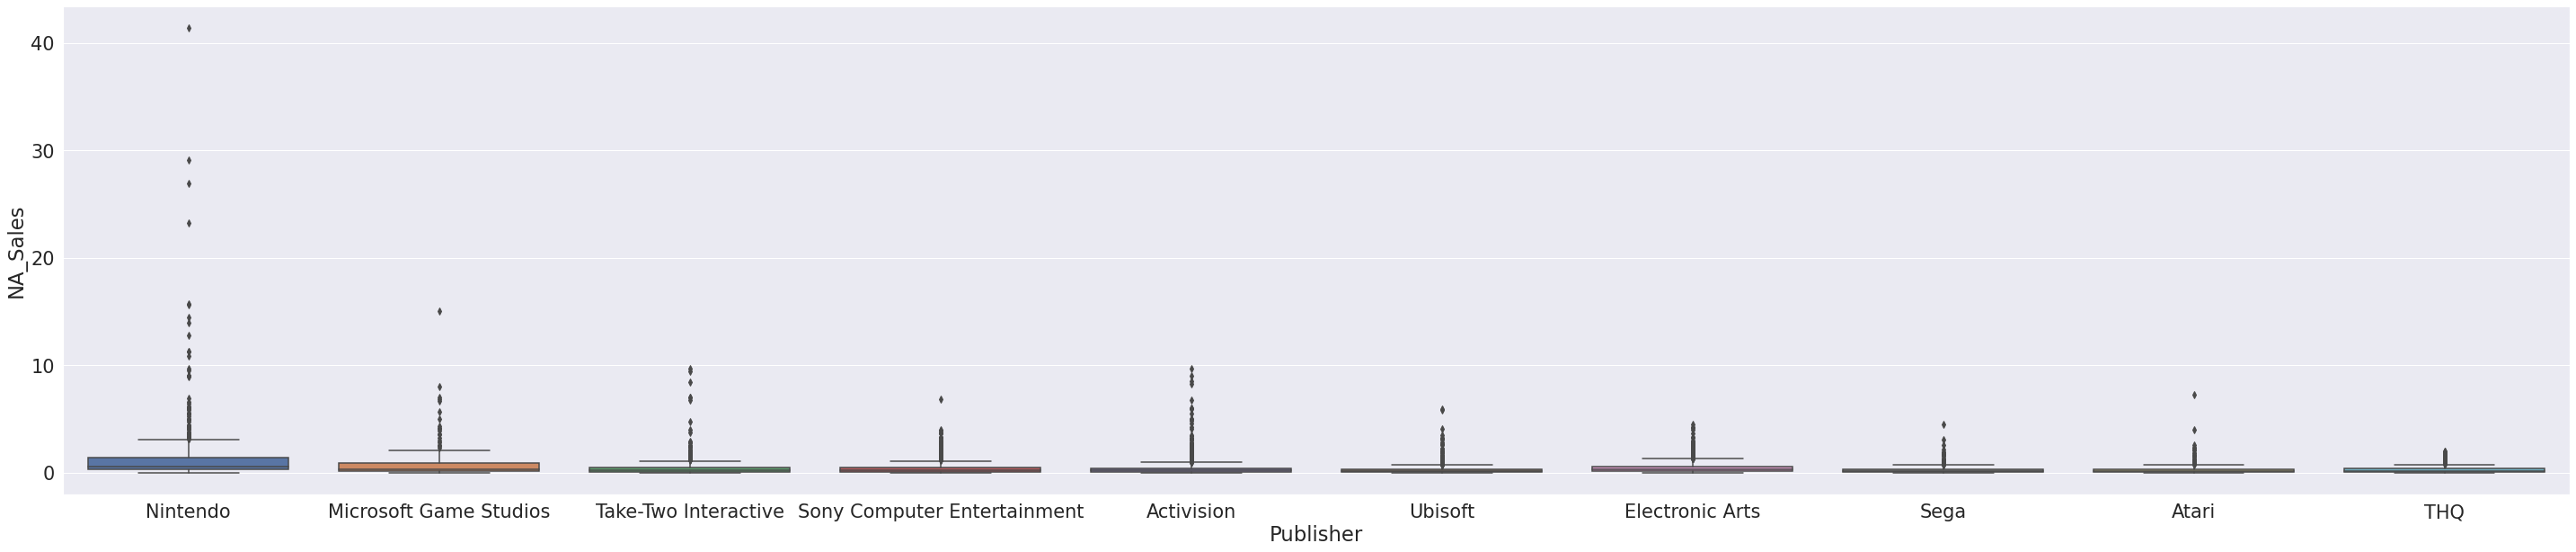

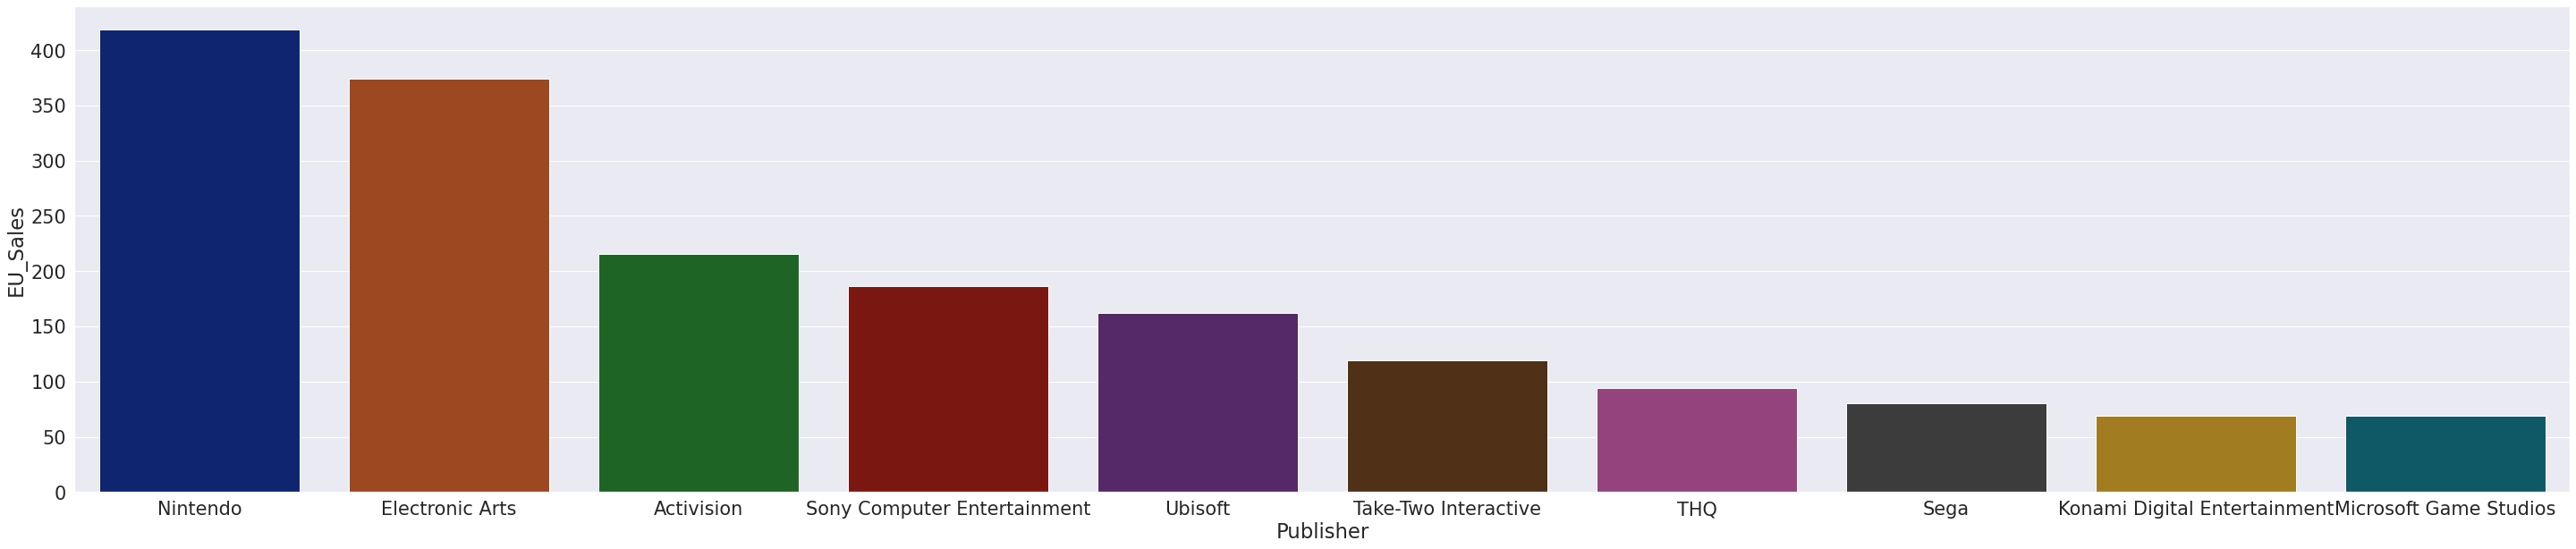

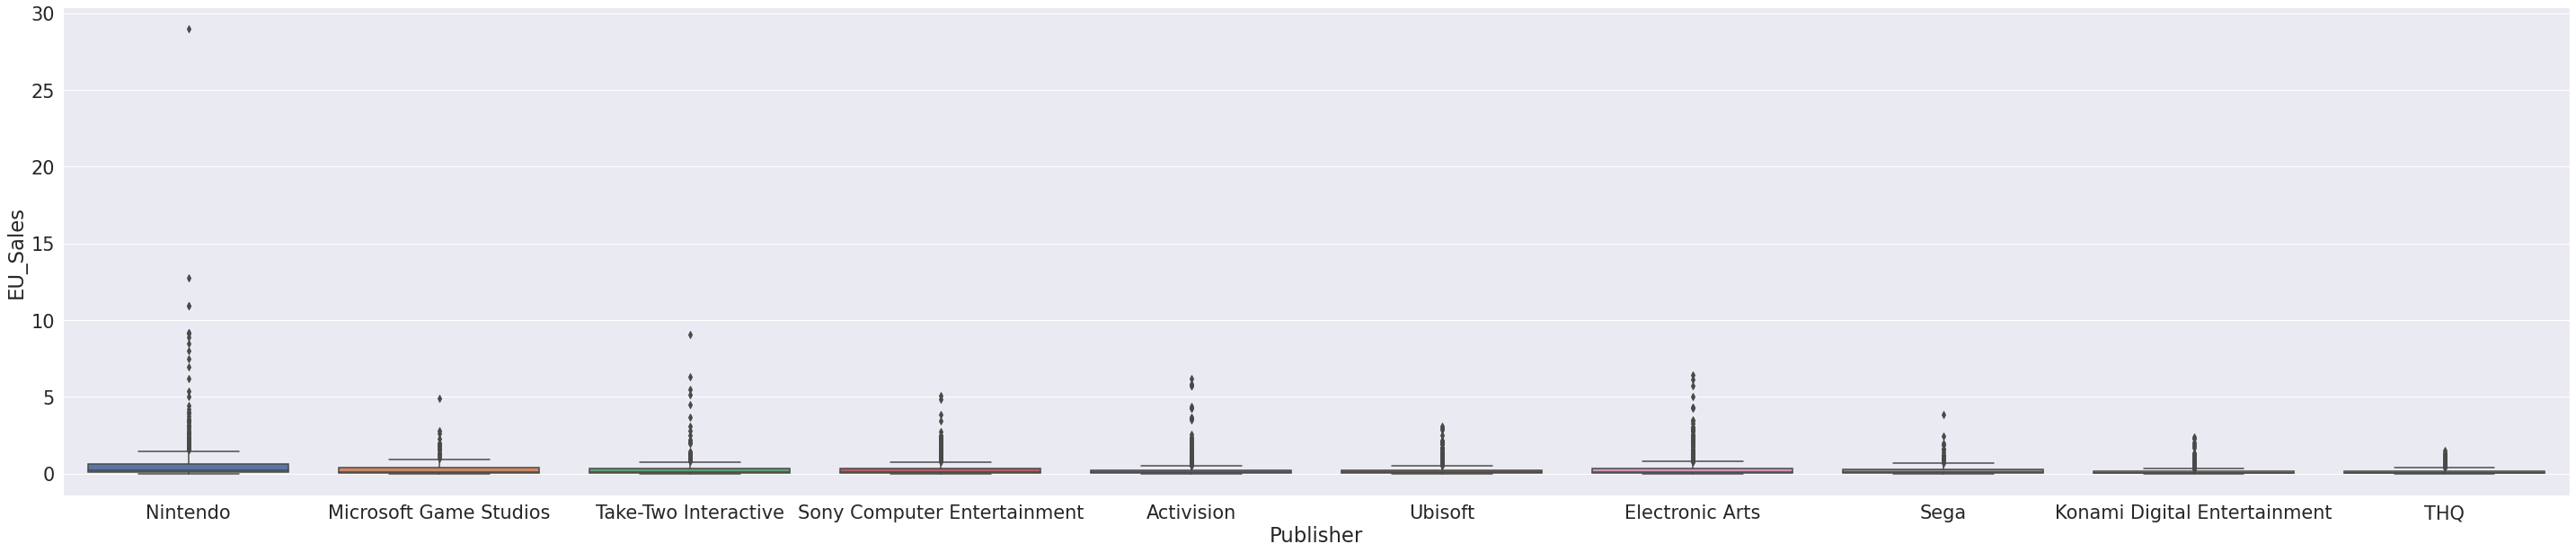

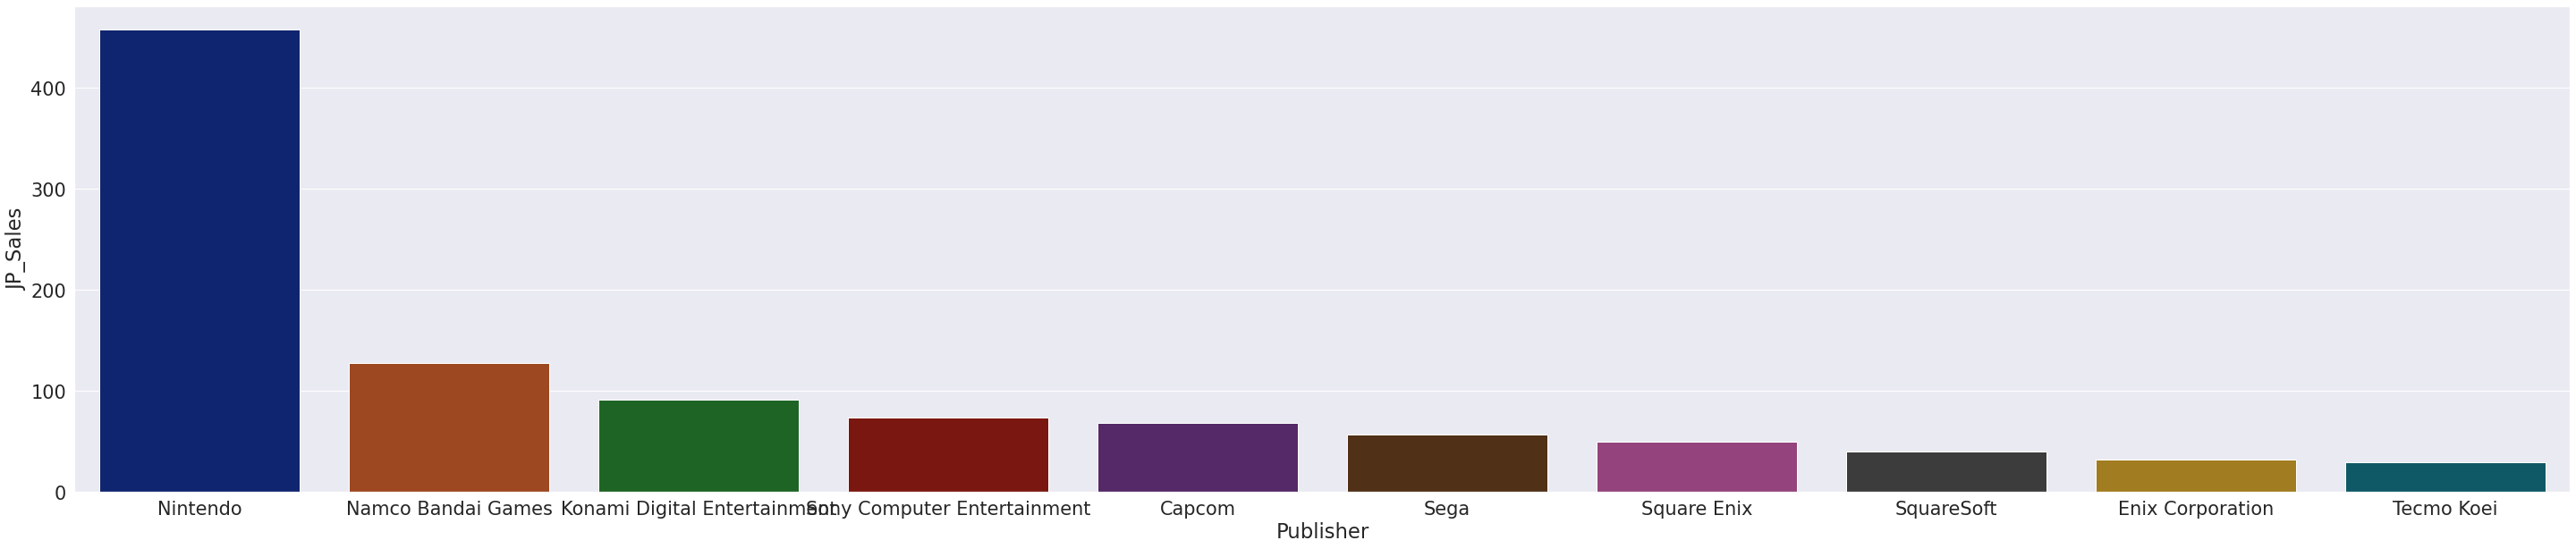

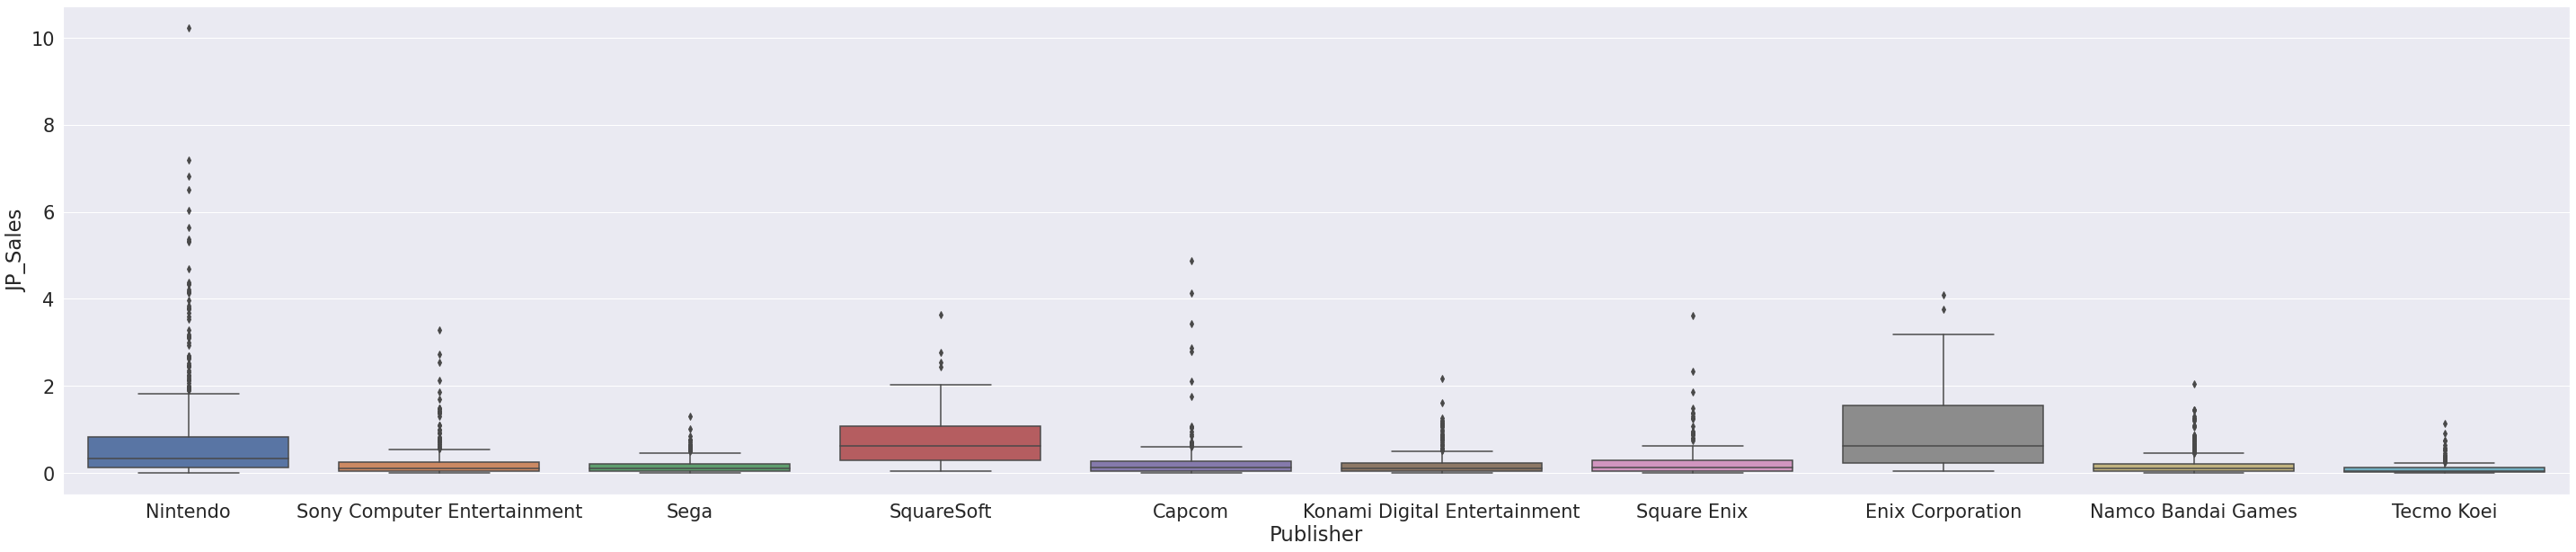

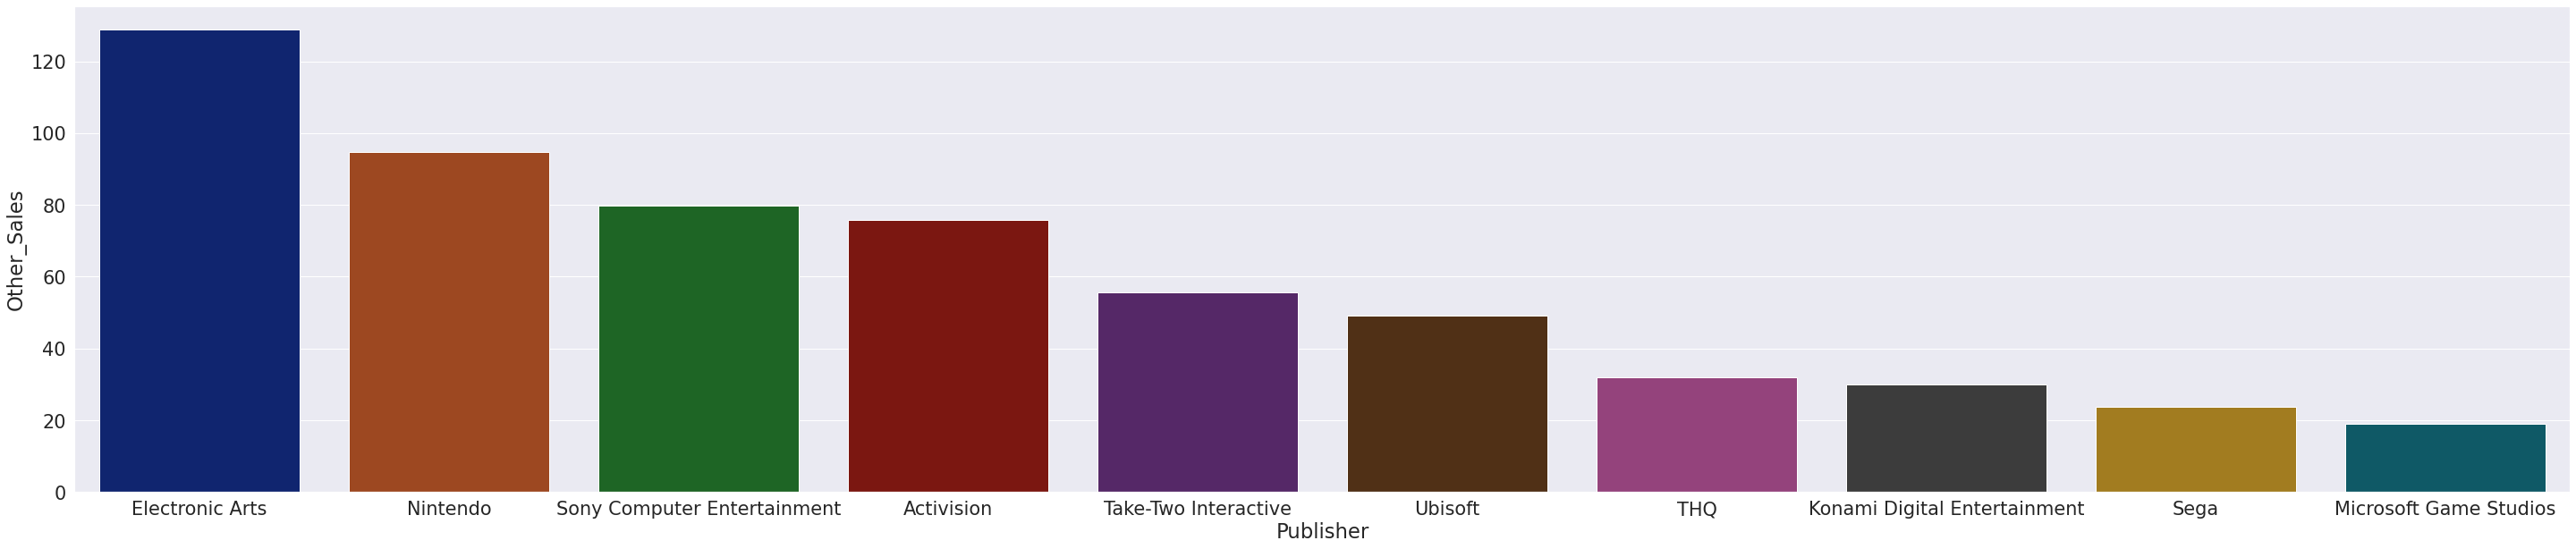

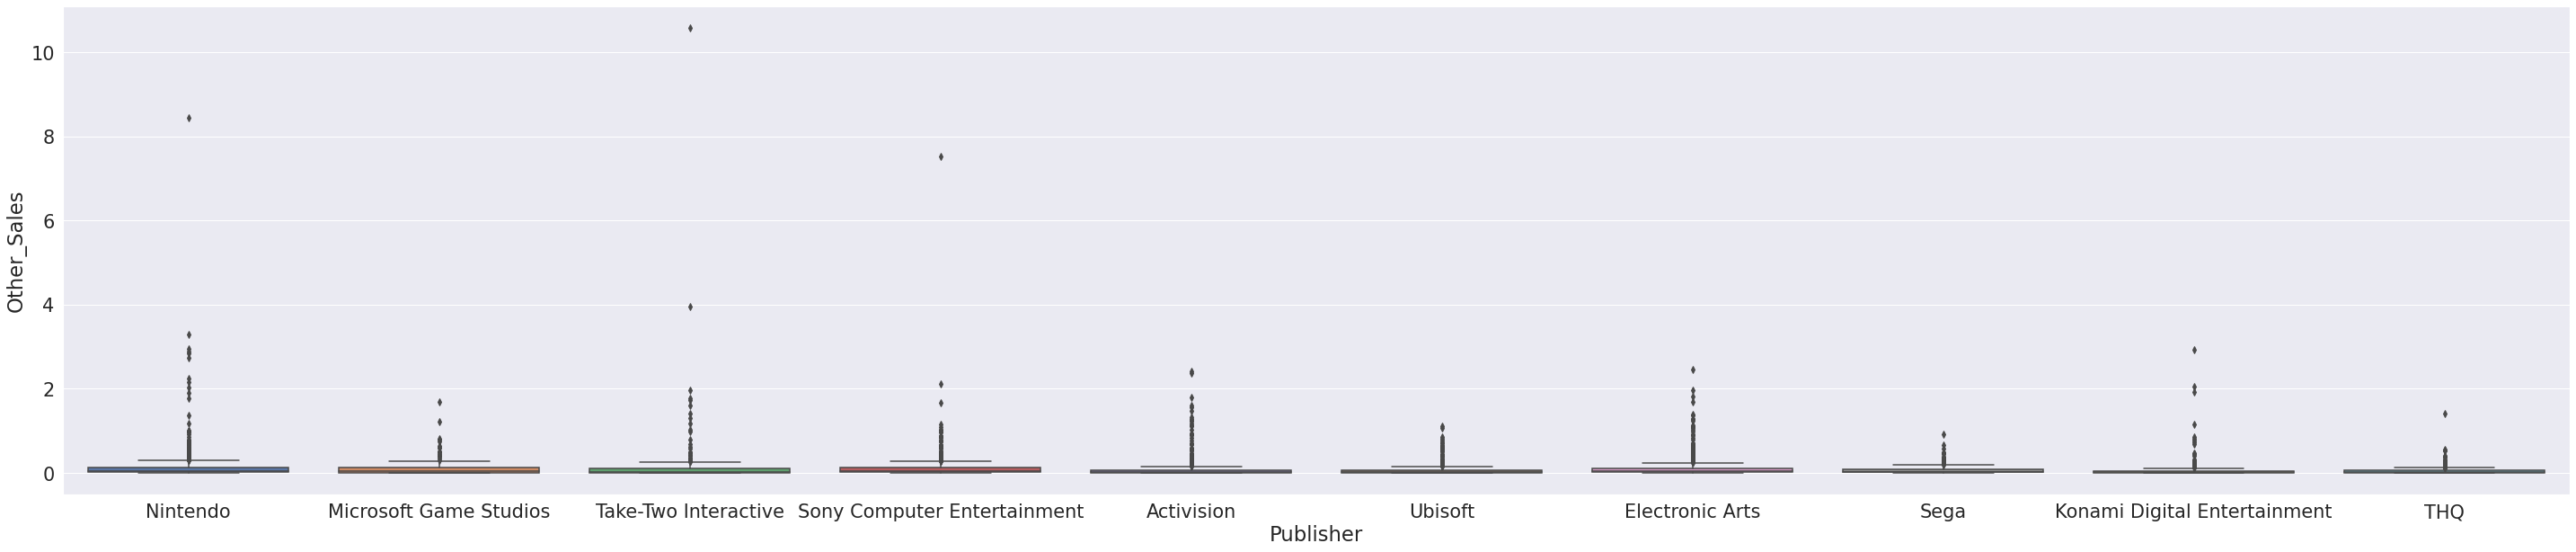

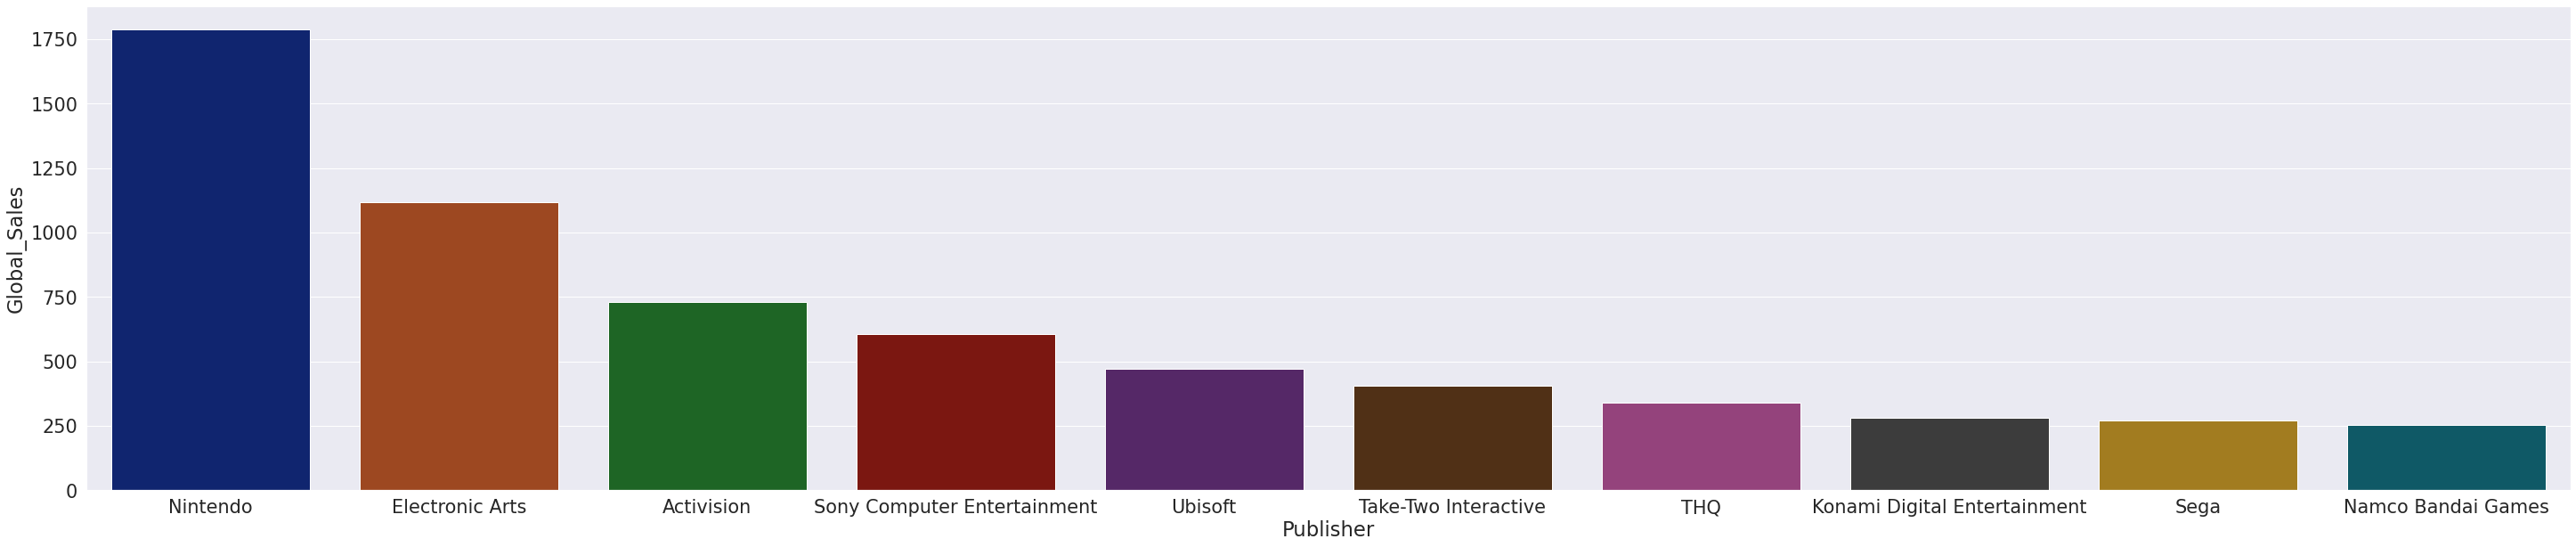

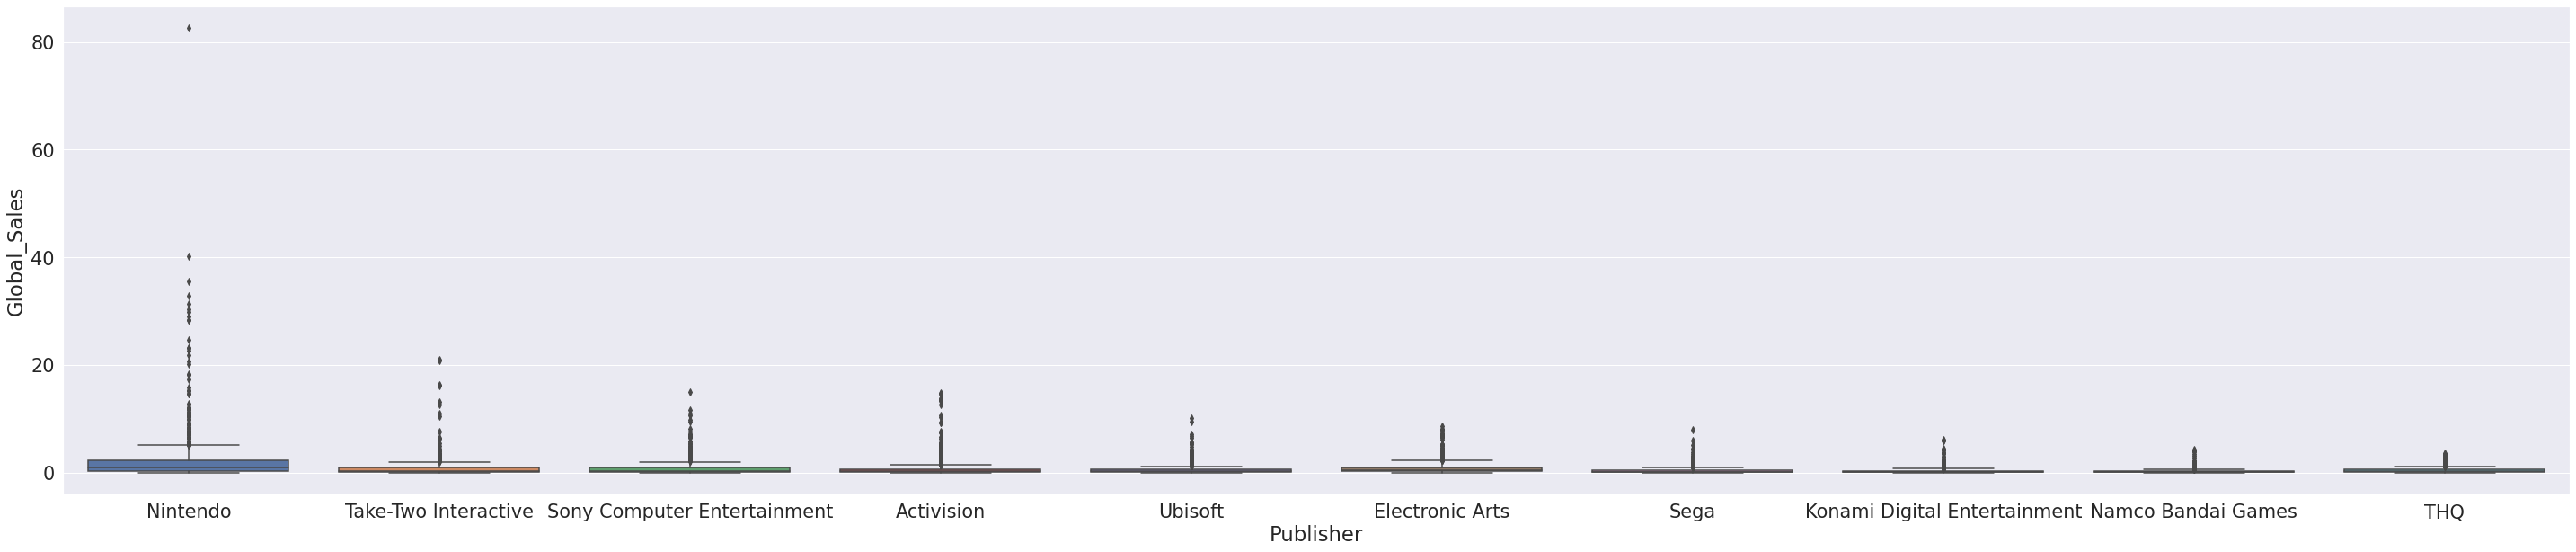

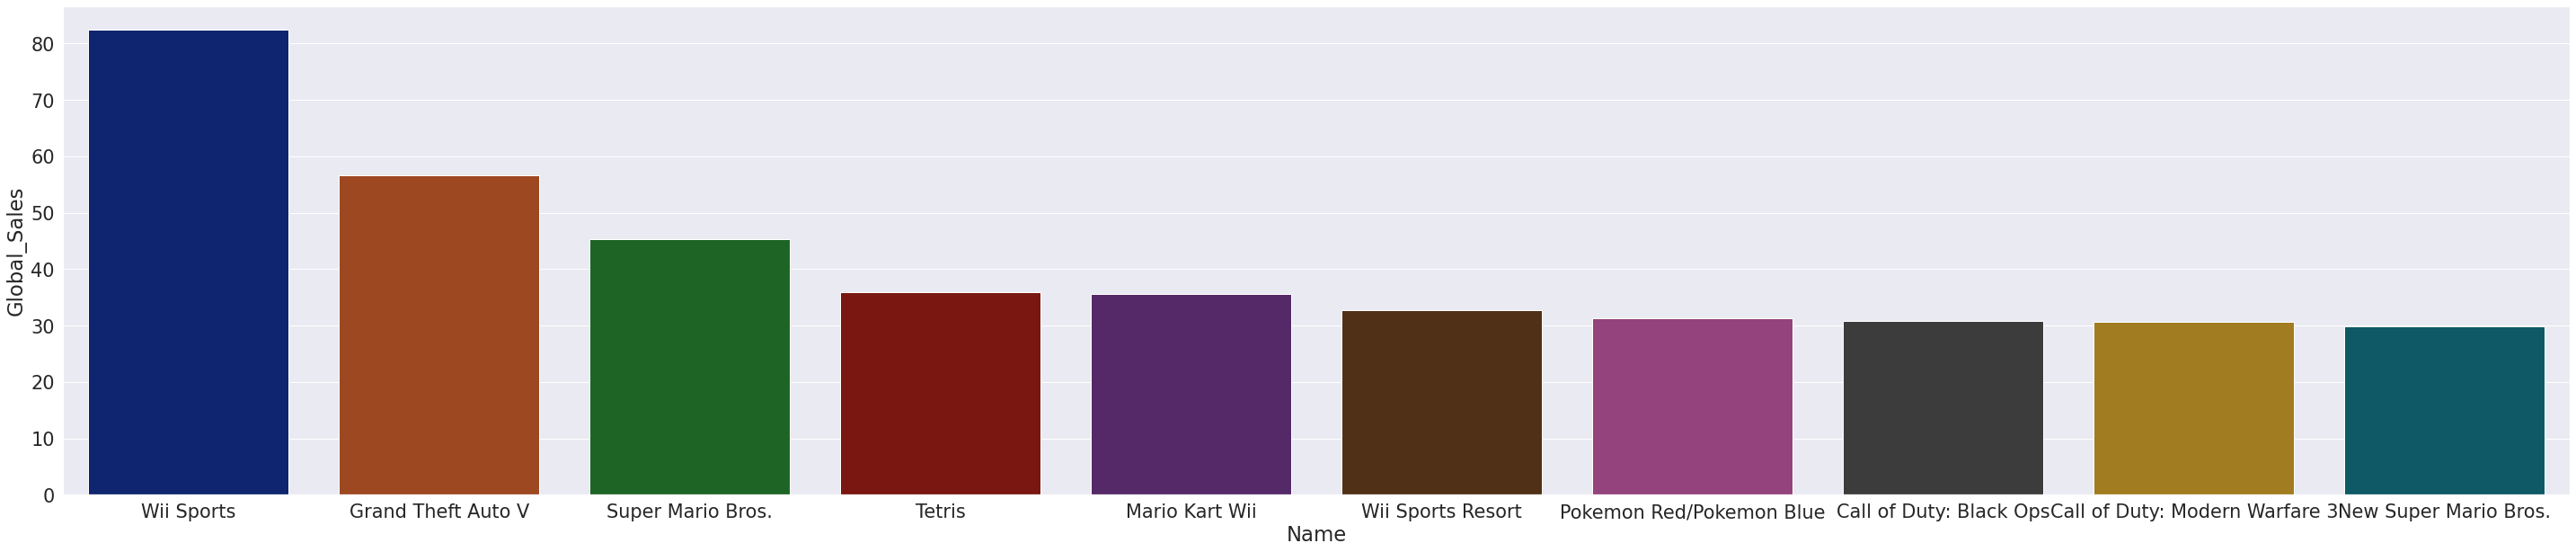

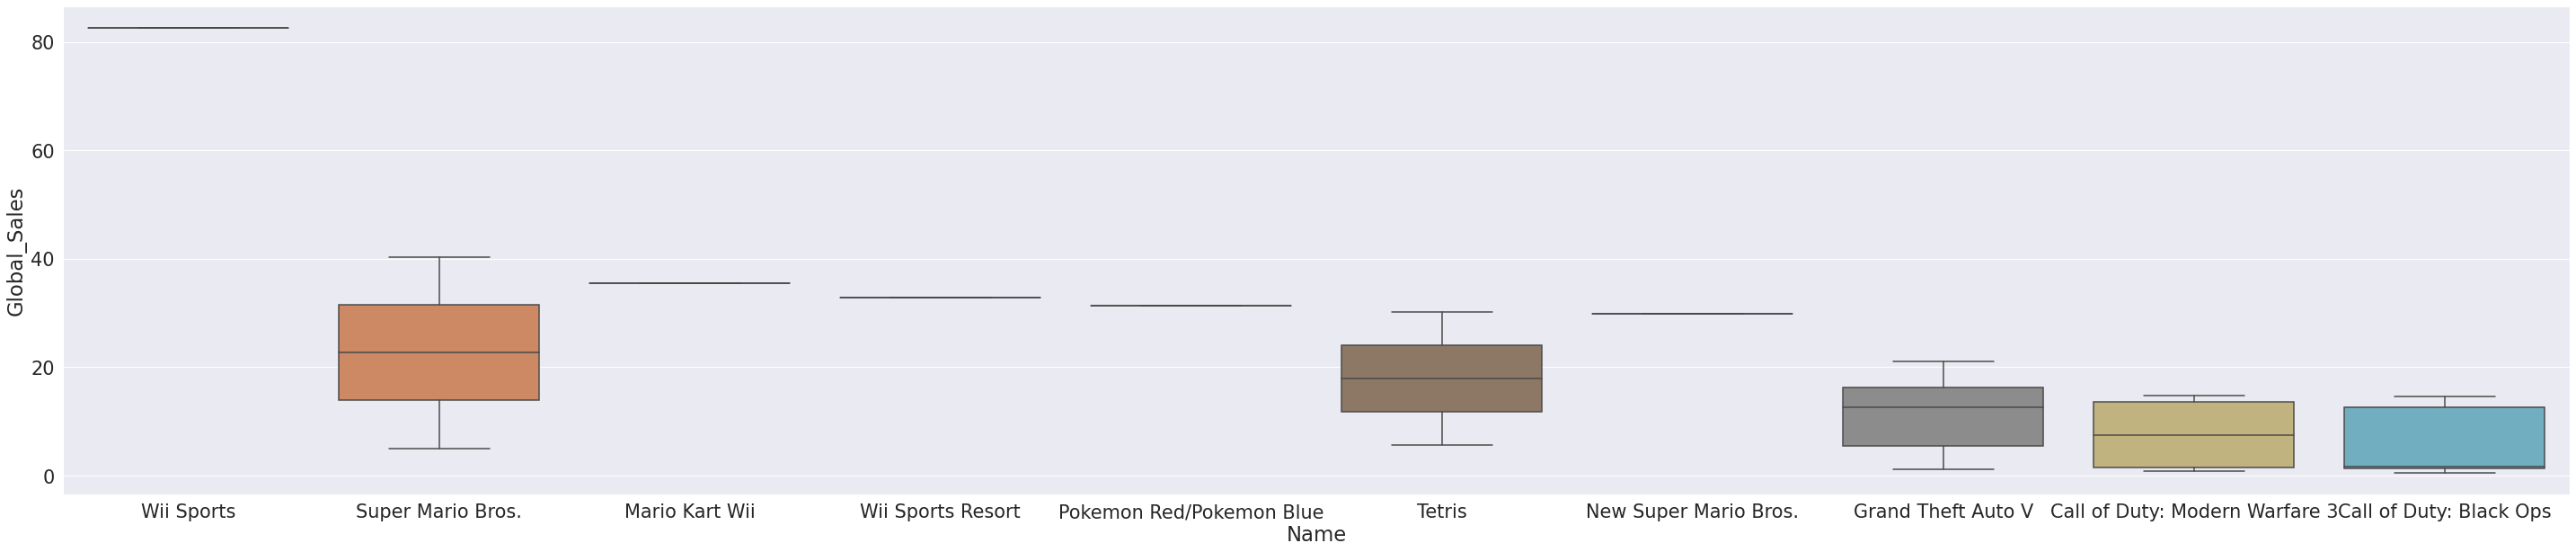

In [3]:
    
#NA sales
plot_most_popular(cleaned_data,"NA_Sales", "Publisher")
#EU Sales
plot_most_popular(cleaned_data,"EU_Sales", "Publisher")
#JP Sales
plot_most_popular(cleaned_data,"JP_Sales", "Publisher")
#Other Sales
plot_most_popular(cleaned_data,"Other_Sales", "Publisher")
#Global Sales
plot_most_popular(cleaned_data,"Global_Sales", "Publisher")        
#to be continued

plot_most_popular(cleaned_data, "Global_Sales", "Name")

<AxesSubplot:title={'center':'Other_Sales'}, ylabel='Platform'>

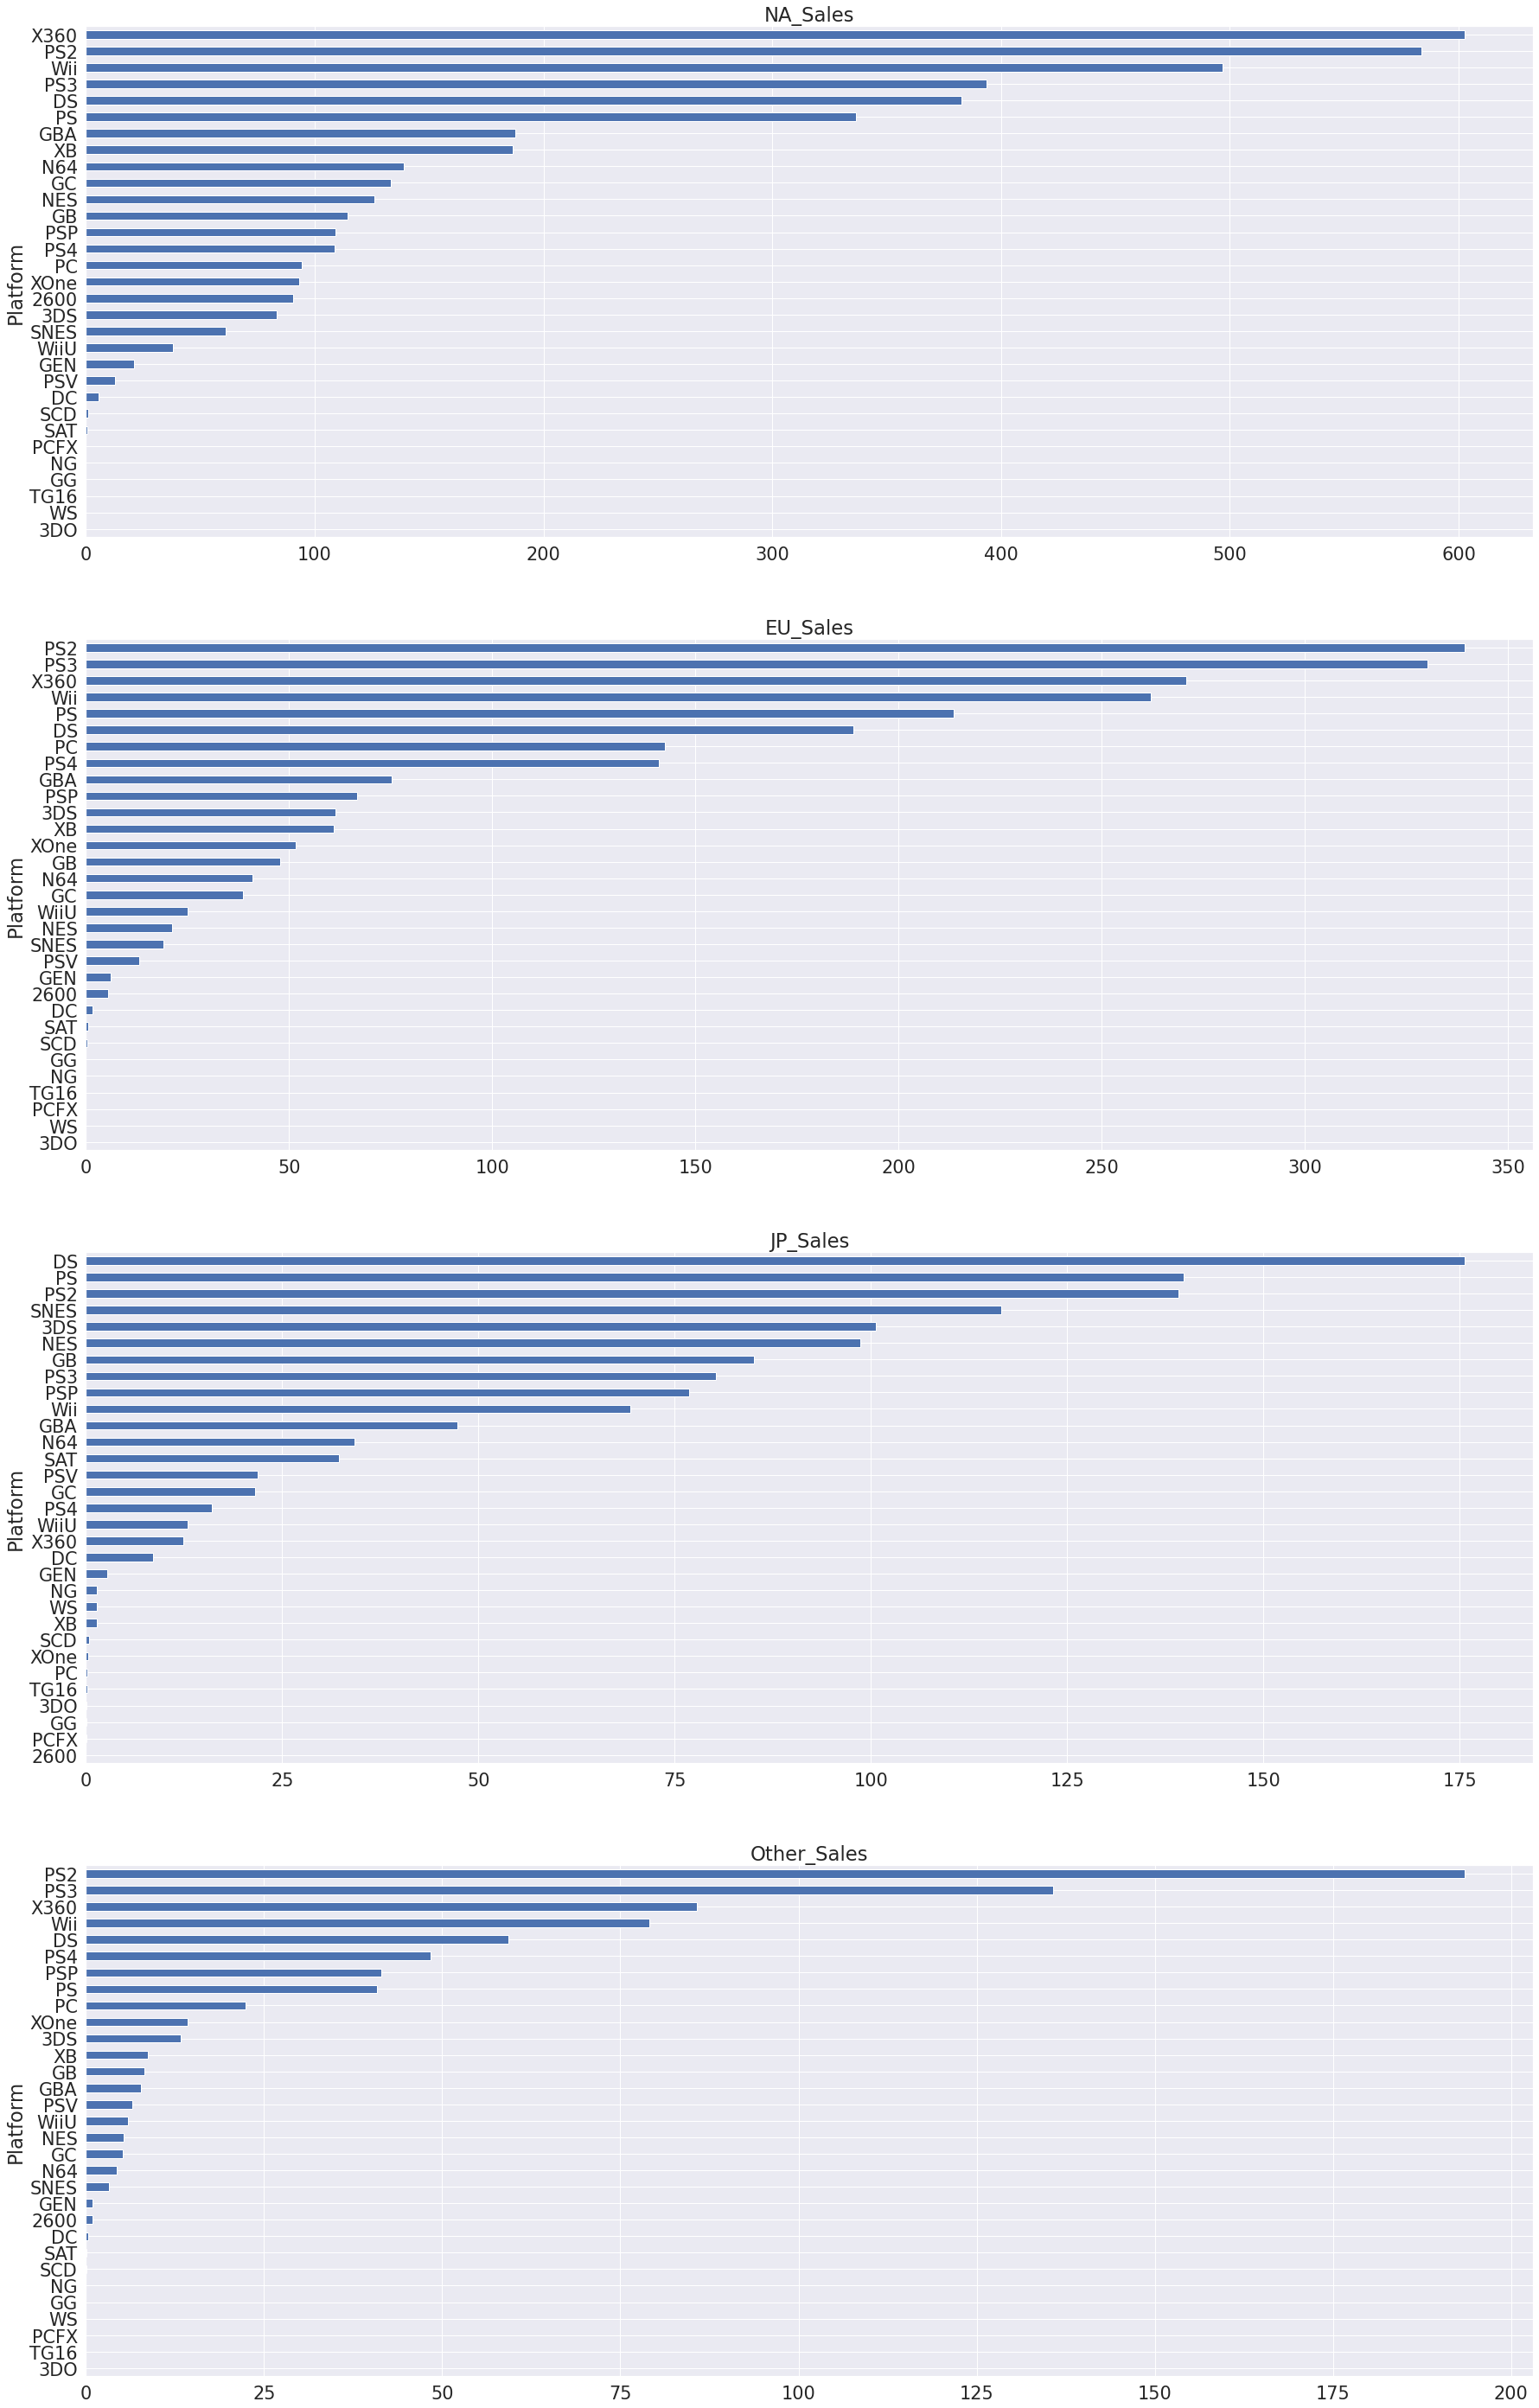

In [4]:
f, axes = plt.subplots(4, 1, figsize=(30, 50))
data.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='NA_Sales', ax = axes[0])
data.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='EU_Sales', ax = axes[1])
data.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='JP_Sales', ax = axes[2])
data.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='Other_Sales', ax = axes[3])

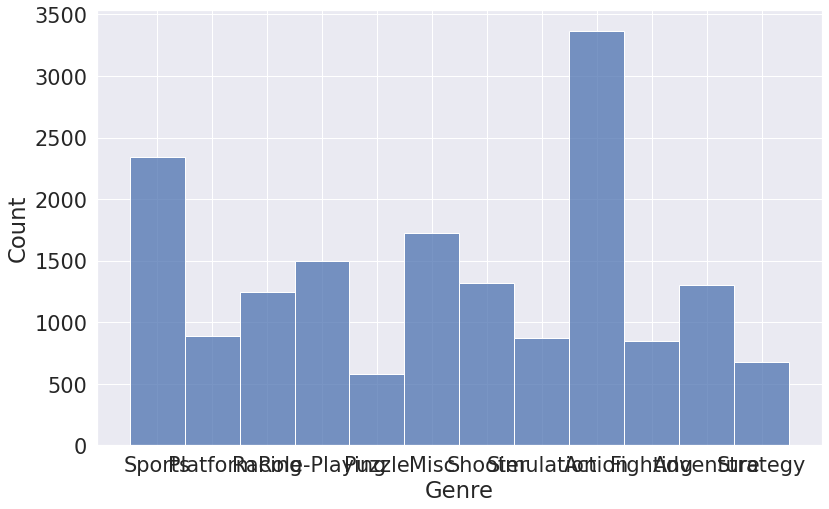

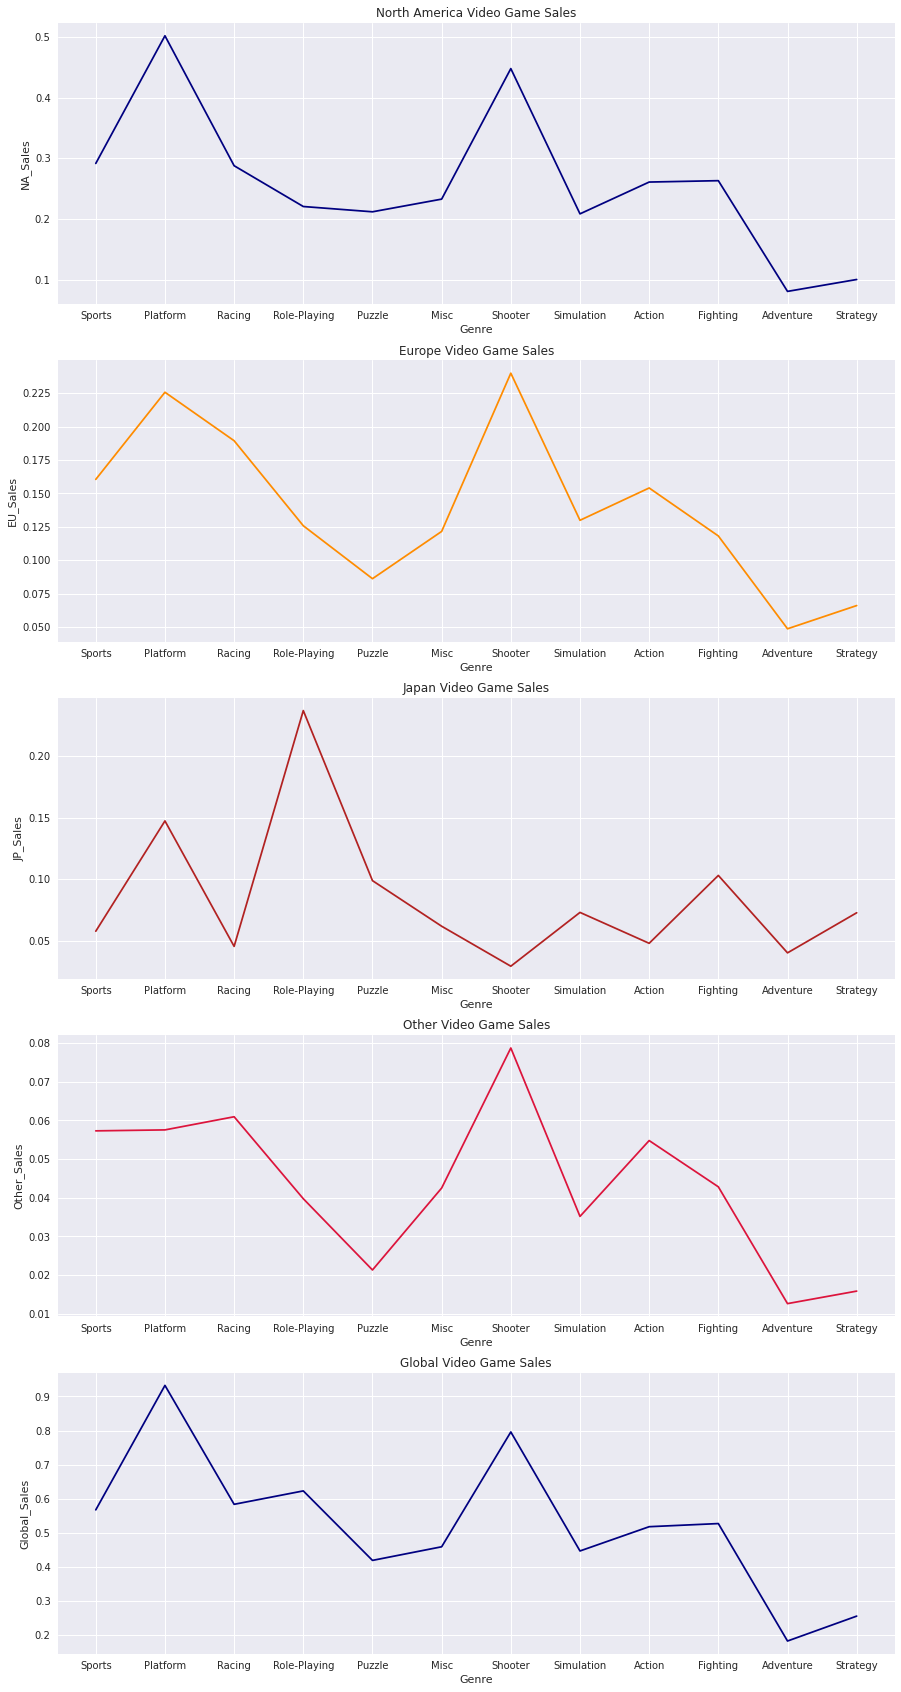

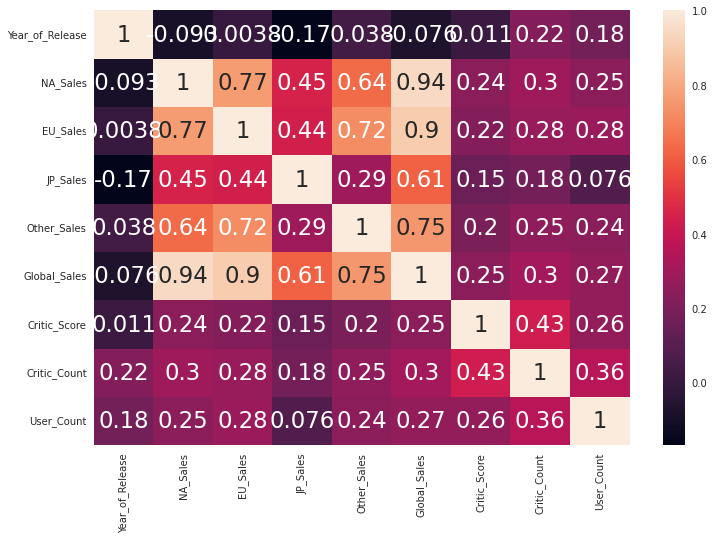

In [5]:

cleanedData = null_cleaning(data, ['Genre', 'Publisher'])
cleanedGenre = cleanedData['Genre'] 

fig, ax = plt.subplots(1,1, figsize=(13,8))
sb.histplot(data = cleanedGenre)

plt.style.use("seaborn")
fig, ax =plt.subplots(5,1, figsize=(15,30)) 

sb.lineplot(data=data, x = 'Genre', y = "NA_Sales", ci=None, ax=ax[0], color="navy")
ax[0].set_title("North America Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "EU_Sales", ci=None, ax=ax[1], color="darkorange")
ax[1].set_title("Europe Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "JP_Sales", ci=None, ax=ax[2], color="firebrick")
ax[2].set_title("Japan Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "Other_Sales", ci=None, ax=ax[3], color="crimson")
ax[3].set_title("Other Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "Global_Sales", ci=None, ax=ax[4], color="navy")
ax[4].set_title("Global Video Game Sales")

plt.figure(figsize=(12, 8))
data_corr = data.corr()
sb.heatmap(data_corr, 
            xticklabels = data_corr.columns.values,
            yticklabels = data_corr.columns.values,
            annot = True);

(16665, 16)
       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6826.000000  6947.000000  6947.000000  6947.000000  6947.000000   
mean       2007.437299     0.392840     0.234648     0.063236     0.082189   
std           4.211160     0.961157     0.682293     0.285257     0.267832   
min        1985.000000     0.000000     0.000000     0.000000     0.000000   
25%        2004.000000     0.060000     0.020000     0.000000     0.010000   
50%        2007.000000     0.150000     0.060000     0.000000     0.020000   
75%        2011.000000     0.390000     0.210000     0.010000     0.070000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score  Critic_Count  User_Score    User_Count  
count   6947.000000   6947.000000   6947.000000  6947.00000   6947.000000  
mean       0.773098     70.263567     28.873615     7.18336    173.821362  
std        1.948883     13.888922     19.195731     1.442

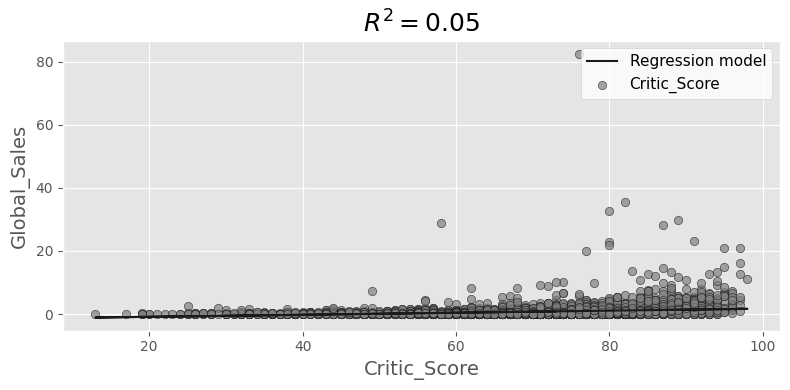

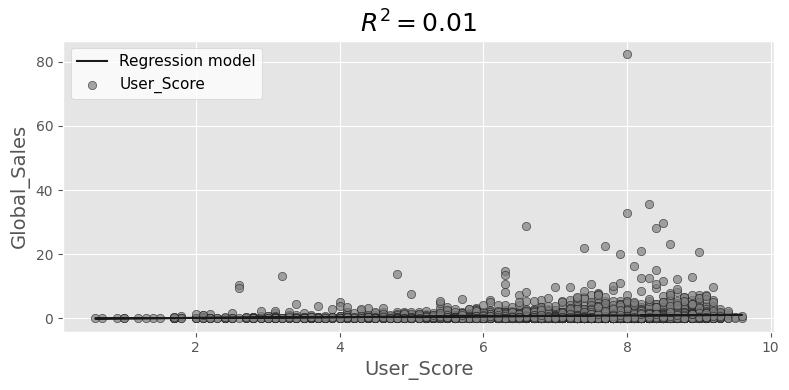

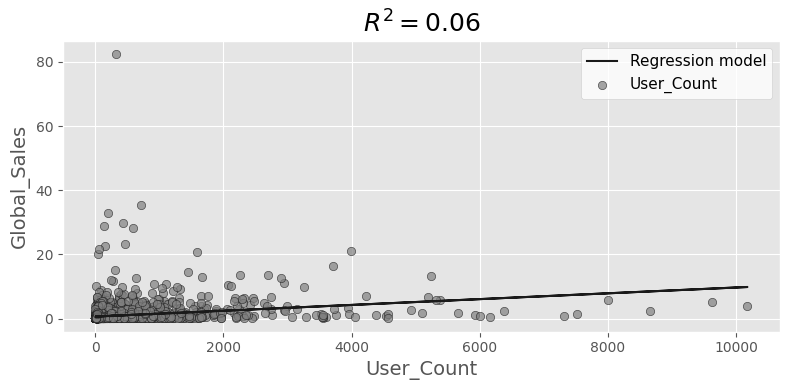

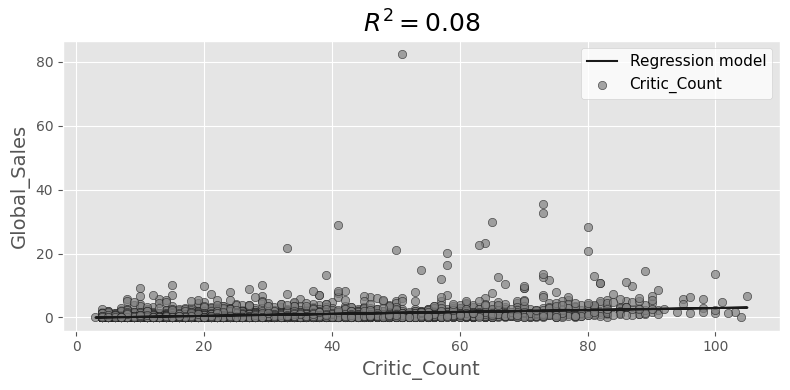

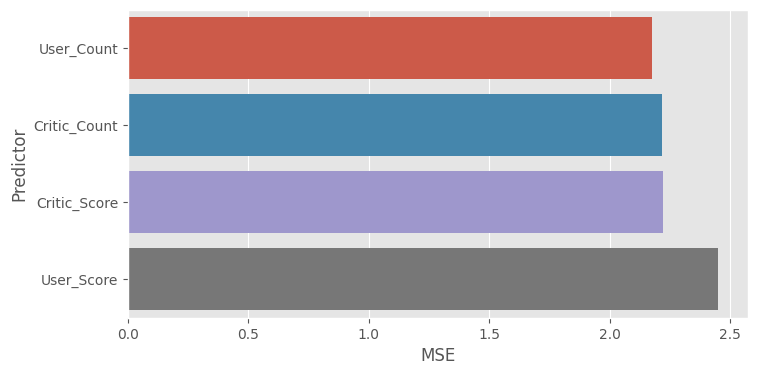

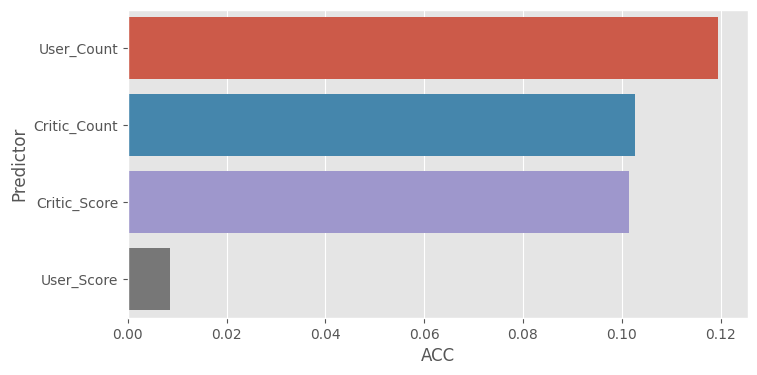

In [6]:
#cleaning data for ratings

#view the set of data first
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)
cleaning = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Rating']
   
print(cleaned_data.shape)
cleaned_data = null_cleaning(data, cleaning)
cleaned_data = outlier_cleaning(cleaned_data, ["User_Count", "Critic_Count",  "Global_Sales"])


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print(cleaned_data.describe())
sales = pd.DataFrame(cleaned_data["Global_Sales"])
predictors = cleaned_data[["Critic_Score", "User_Count", "Critic_Count", "User_Score"]]

correlations = cleaned_data.corr()["Global_Sales"].dropna().sort_values()
print(correlations)
def reg(data, sales, predictor):
    pred = pd.DataFrame(data[predictor])
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(pred,sales, test_size = 0.25, random_state=42)


    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
  
    if(type(predictor) == str):
        plt.style.use('default')
        plt.style.use('ggplot')
        
        fig, ax = plt.subplots(figsize=(8, 4))
        
        ax.plot(X_train, y_train_pred, color='k', label='Regression model')
        ax.scatter(X_train, y_train, edgecolor='k', facecolor='grey', alpha=0.7, label=predictor)
        ax.set_ylabel('Global_Sales', fontsize=14)
        ax.set_xlabel(str(predictor), fontsize=14)
        ax.legend(facecolor='white', fontsize=11)
        ax.set_title('$R^2= %.2f$' % linreg.score(X_train, y_train), fontsize=18)
        fig.tight_layout()

    # Check the Goodness of Fit (on Train Data)
    print("For predictor "+ str(predictor)+":")
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    acc = linreg.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_test_pred)    
    return [str(predictor),acc, mse]

result_list = []
result_list.append(reg(predictors,sales, "Critic_Score"))
result_list.append(reg(predictors,sales, "User_Score"))
result_list.append(reg(predictors,sales, "User_Count"))
result_list.append(reg(predictors,sales, "Critic_Count"))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


Intercept of Regression 	: b =  [0.28344936]
Coefficients of Regression 	: a =  [[5.20583676]]

For predictor Other_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.45631692220240727
Mean Squared Error (MSE) 	: 1.102532847498674

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7035894720242046
Mean Squared Error (MSE) 	: 1.0373416210269475

Intercept of Regression 	: b =  [0.07818658]
Coefficients of Regression 	: a =  [[1.7185844]]

For predictor NA_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.860457025897511
Mean Squared Error (MSE) 	: 0.2829786669264844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9250954869179324
Mean Squared Error (MSE) 	: 0.26214173144730973

Intercept of Regression 	: b =  [0.13489044]
Coefficients of Regression 	: a =  [[2.7512681]]

For predictor EU_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7510142776893103
Mean Squared E

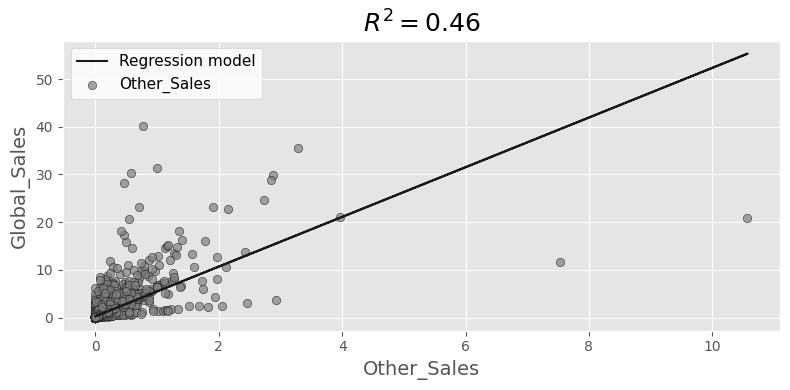

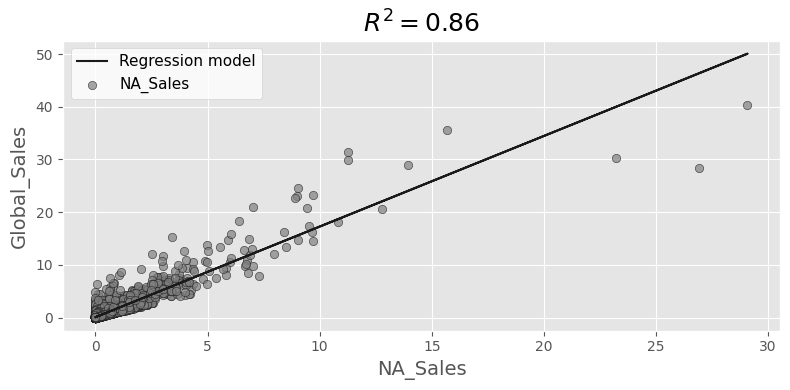

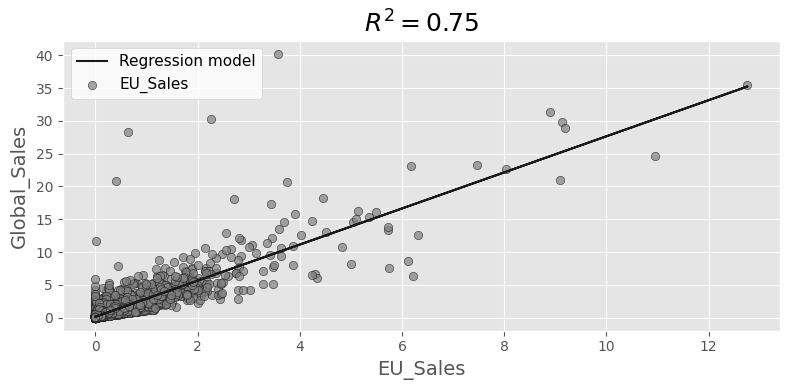

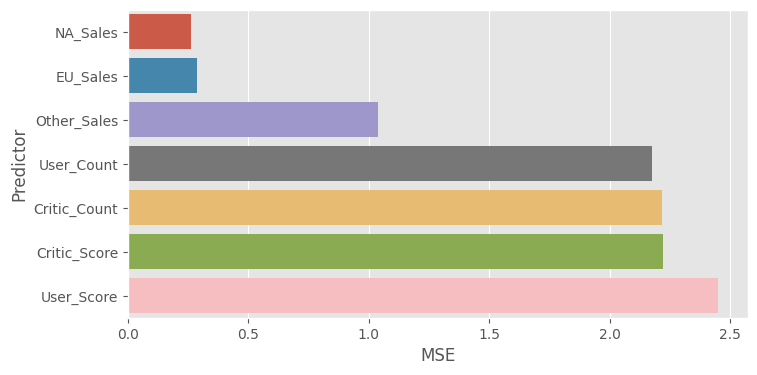

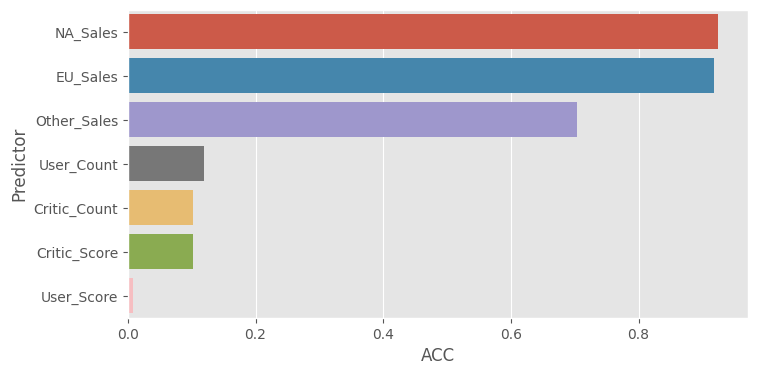

In [7]:
# Preparing on how to predict global sales based on regional sales

predictors = ["JP_Sales", "NA_Sales", "EU_Sales", "Other_Sales", "Global_Sales"]
cleaned_data = null_cleaning(data, predictors)
cleaned_data = outlier_cleaning(cleaned_data, ["Global_Sales"])
sales = pd.DataFrame(cleaned_data["Global_Sales"])
result = []
result_list.append(reg(cleaned_data,sales, "Other_Sales"))
result_list.append(reg(cleaned_data,sales, "NA_Sales"))
result_list.append(reg(cleaned_data,sales, "EU_Sales"))
acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64
Intercept of Regression 	: b =  [0.0683999]
Coefficients of Regression 	: a =  [[1.7188414  0.00231842]]

For predictor ['NA_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8604812950304785
Mean Squared Error (MSE) 	: 0.28288935019993844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9251892840222958
Mean Squared Error (MSE) 	: 0.2618881693513801

Intercept of Regression 	: b =  [0.1208603]
Coefficients of Regression 	: a =  [[2.75533668 0.00306893]]

For predictor ['EU_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7517426801098726
Mean Squared Error (MSE) 	: 0.5033687197816115

Goodness of

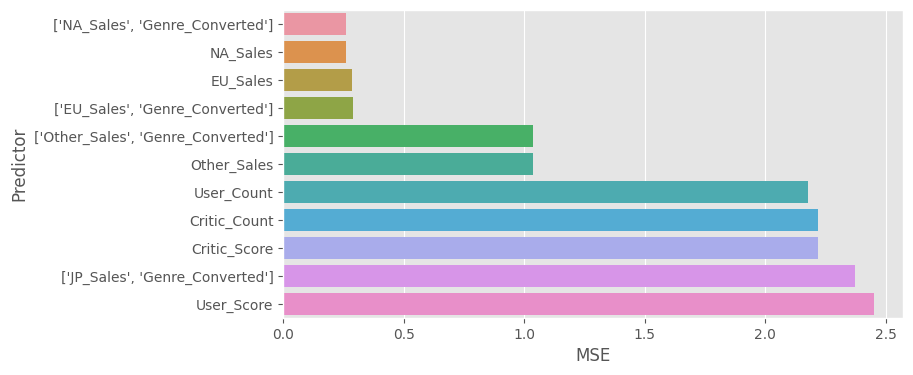

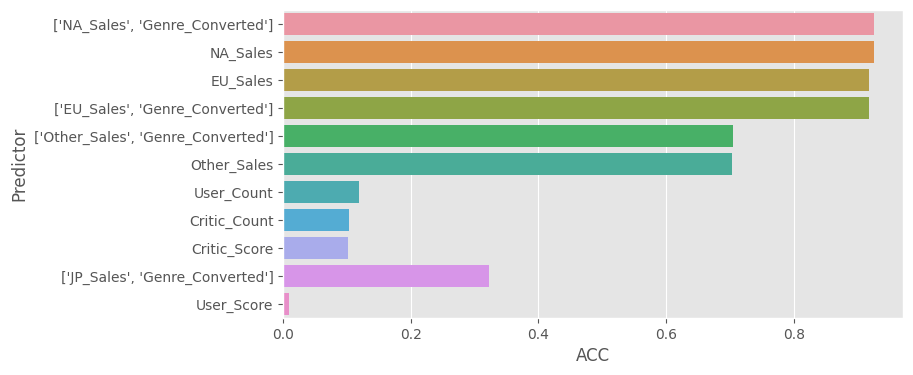

In [8]:
#model for genre and regional sales to test for global sales
predictors = ["JP_Sales", "NA_Sales", "EU_Sales", "Other_Sales", "Global_Sales","Genre"]
cleaned_data = null_cleaning(data, predictors)
print(cleaned_data["Genre"].value_counts())
cleaned_data = outlier_cleaning(cleaned_data, ["Global_Sales"])
sales = pd.DataFrame(cleaned_data["Global_Sales"])

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cleaned_data["Genre_Converted"] = ord_enc.fit_transform(cleaned_data[["Genre"]])


result_list.append(reg(cleaned_data,sales, ["NA_Sales", "Genre_Converted"]))

result_list.append(reg(cleaned_data,sales, ["EU_Sales", "Genre_Converted"]))

result_list.append(reg(cleaned_data,sales, ["JP_Sales", "Genre_Converted"]))

result_list.append(reg(cleaned_data,sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)




Cross validation:  [0.07676096 0.04797116 0.08004022 0.02932004 0.12151041 0.00910827
 0.03247292 0.00301593 0.         0.        ]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8152605987429243
Mean Squared Error (MSE) 	: 0.6467130139043794

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7361496928449819
Mean Squared Error (MSE) 	: 0.9236547601578988

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5023173374834762
Mean Squared Error (MSE) 	: 1.7422263602345083

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.24220478257982647
Mean Squared Error (MSE) 	: 2.6527964562262256



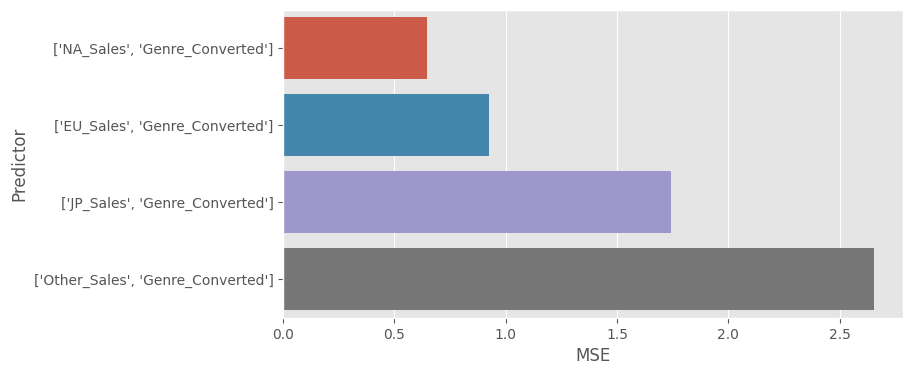

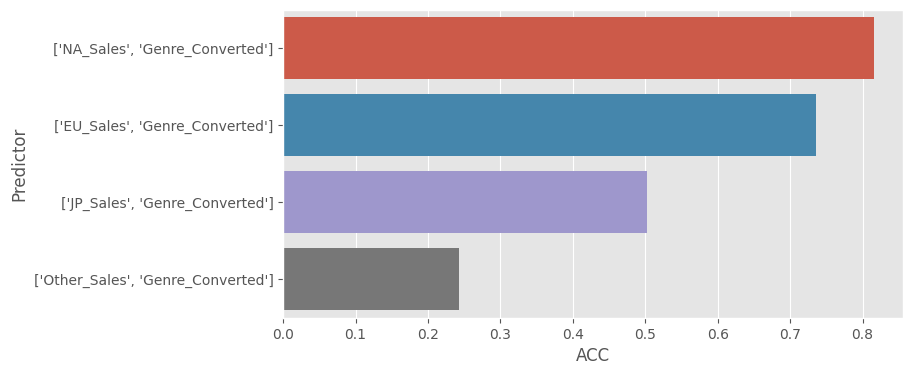

In [9]:
#using Gradient boosting regressor

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC


result_list = []
def grad(data, sales, predictor):
    X = pd.DataFrame(data[predictor])
    y = sales
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
    lasso = linear_model.Lasso()
    scores = cross_validate(lasso, X_train, y_train, cv=10,
                       scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)
    print("Cross validation: ",scores['train_r2'])
    reg = GradientBoostingRegressor(random_state=42)
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred= reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_test_pred)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", acc)
    print("Mean Squared Error (MSE) \t:", mse)
    print()
    
    return [str(predictor),acc, mse]

result_list.append(grad(cleaned_data, sales, ["NA_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["EU_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["JP_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

